In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [36]:
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [41]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
X=pd.concat([X,geography,gender],axis=1)

In [5]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ANN starts

In [9]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [10]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [11]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 12s 2ms/step - loss: 0.5300 - accuracy: 0.7914 - val_loss: 0.4918 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 977us/step - loss: 0.4767 - accuracy: 0.7982 - val_loss: 0.4655 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4528 - accuracy: 0.8048 - val_loss: 0.4529 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 937us/step - loss: 0.4544 - accuracy: 0.7944 - val_loss: 0.4466 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4493 - accuracy: 0.7870 - val_loss: 0.4429 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4290 - accuracy: 0.8021 - val_loss: 0.4401 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4437 - accuracy: 0.7933 - val_loss: 0.4368 - val_accuracy: 0

536/536 [==============================] - 0s 899us/step - loss: 0.3426 - accuracy: 0.8588 - val_loss: 0.3651 - val_accuracy: 0.8482
Epoch 58/100
536/536 [==============================] - 0s 922us/step - loss: 0.3335 - accuracy: 0.8632 - val_loss: 0.3659 - val_accuracy: 0.8489
Epoch 59/100
536/536 [==============================] - 0s 908us/step - loss: 0.3251 - accuracy: 0.8710 - val_loss: 0.3637 - val_accuracy: 0.8474
Epoch 60/100
536/536 [==============================] - 1s 965us/step - loss: 0.3568 - accuracy: 0.8567 - val_loss: 0.3665 - val_accuracy: 0.8470
Epoch 61/100
536/536 [==============================] - 0s 900us/step - loss: 0.3381 - accuracy: 0.8592 - val_loss: 0.3659 - val_accuracy: 0.8493
Epoch 62/100
536/536 [==============================] - 1s 924us/step - loss: 0.3425 - accuracy: 0.8592 - val_loss: 0.3646 - val_accuracy: 0.8508
Epoch 63/100
536/536 [==============================] - 0s 911us/step - loss: 0.3350 - accuracy: 0.8614 - val_loss: 0.3645 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


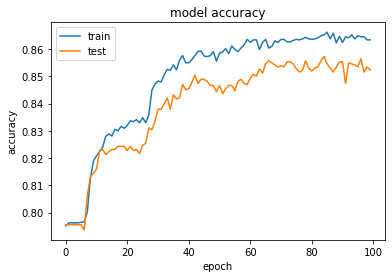

In [13]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

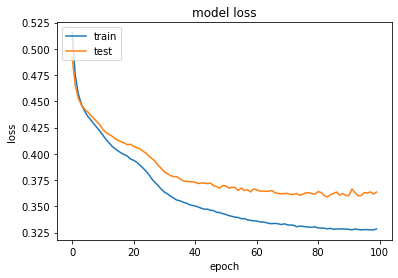

In [14]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1511,   84],
       [ 202,  203]], dtype=int64)

In [17]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.857

In [18]:
#now to improve the model do hyperparameter tuning

#always use dropout for very very deep neural network

In [19]:
## Perform Hyperparameter Optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [23]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [24]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [25]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [27]:
grid_result = grid.fit(X_train, y_train)

In [28]:
print(grid_result.best_score_, grid_result.best_params_)

0.856249988079071 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [40, 20]}


In [29]:
# Predicting the Test set results
y_pred = grid.predict(X_test)
y_pred = (y_pred > 0.5)

C:\Users\User\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1529,   66],
       [ 211,  194]], dtype=int64)

In [31]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8615

In [34]:
print(y_test.shape), print(y_pred.shape)

(2000,)
(2000, 1)


(None, None)

In [42]:
data = pd.DataFrame(X_test, columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'German', 'Spain', 'Male'])

In [44]:
data['exited'] = y_pred

In [46]:
data['exited'].value_counts()

False    1740
True      260
Name: exited, dtype: int64

In [47]:
data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,German,Spain,Male,exited
0,-0.552043,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,1.754865,-0.573694,-1.091687,False
1,-1.314903,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,-0.569844,-0.573694,-1.091687,False
2,0.571630,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,-0.569844,1.743090,-1.091687,False
3,1.416961,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,-0.569844,-0.573694,0.916013,False
4,0.571630,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,1.754865,-0.573694,0.916013,False
5,0.200509,1.736588,-0.685390,1.590021,0.809503,0.642595,-1.032270,-0.019302,-0.569844,1.743090,-1.091687,True
6,-0.624205,-0.464608,-1.723466,-0.164023,0.809503,-1.556190,0.968738,1.045871,-0.569844,1.743090,0.916013,False
7,-0.149995,-0.943129,0.352686,1.302385,0.809503,0.642595,0.968738,0.016166,-0.569844,1.743090,-1.091687,False
8,-0.541734,2.406518,1.390762,-1.215717,-0.921591,-1.556190,0.968738,-1.511970,-0.569844,-0.573694,-1.091687,False
9,-2.005601,2.310814,-1.377440,1.426618,0.809503,-1.556190,-1.032270,0.705412,-0.569844,-0.573694,-1.091687,True
